In [9]:
import numpy as np
from PIL import Image
from torchvision.transforms import PILToTensor, ToTensor, Compose, Resize, ToPILImage
from src.datasets.utils.ResizeToDivisibleBy32 import ResizeToDivisibleBy32
from src.datasets.utils.ConvertDubaiMasks import ConvertDubaiMasks


## Custom transform

In [2]:
DUBAI_SINGLE_MASK_PATH = r"D:\__repos\aerial_segmentation\data\DubaiSemanticSegmentationDataset\Tile 5\masks\image_part_004.png"

In [3]:
color_classes_dict = {
    (60, 17, 152): 0,   # Building
    (132, 41, 246): 1,  # Land (unpaved area)
    (110, 193, 228): 2,# Road
    (254, 221, 58): 3,  # Vegetation
    (226, 169, 41): 4,  # Water
    (155, 155, 155): 5  # Unlabeled
}

In [4]:
convert_dubai_masks = ConvertDubaiMasks(color_classes_dict)
pil_to_tensor_transform = PILToTensor()
to_pil_transform = ToPILImage()

In [5]:
mask = Image.open(DUBAI_SINGLE_MASK_PATH)


In [6]:
print(mask.getextrema())
print(mask.size)
print(mask.mode)

((60, 254), (16, 221), (41, 246))
(1126, 1058)
RGB


In [7]:
pil_to_tensor_transform = PILToTensor()
torch_mask = pil_to_tensor_transform(mask)

In [8]:
print(torch_mask.shape)
print(torch_mask.min())
print(torch_mask.max())

torch.Size([3, 1058, 1126])
tensor(16, dtype=torch.uint8)
tensor(254, dtype=torch.uint8)


In [9]:
if mask.mode != 'P':
    convert_dubai_masks_transform = ConvertDubaiMasks()
    torch_mask = convert_dubai_masks_transform(torch_mask)

In [38]:
print(torch_mask.shape)
print(torch_mask.min())
print(torch_mask.max())

torch.Size([1058, 1126])
tensor(0, dtype=torch.uint8)
tensor(5, dtype=torch.uint8)


## Function from kaggle

In [10]:
Building = '#3C1098'.lstrip('#')
Building = np.array(tuple(int(Building[i:i+2], 16) for i in (0, 2, 4))) # 60, 16, 152

Land = '#8429F6'.lstrip('#')
Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0, 2, 4))) #132, 41, 246

Road = '#6EC1E4'.lstrip('#') 
Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4))) #110, 193, 228

Vegetation =  'FEDD3A'.lstrip('#') 
Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4))) #254, 221, 58

Water = 'E2A929'.lstrip('#') 
Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4))) #226, 169, 41

Unlabeled = '#9B9B9B'.lstrip('#') 
Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4))) #155, 155, 155

In [11]:
def rgb_to_2D_label(label):
    label_seg = np.zeros(label.shape, dtype=np.uint8)
    label_seg [np.all(label == Unlabeled, axis = -1)] = 0
    label_seg [np.all(label == Land, axis = -1)] = 1
    label_seg [np.all(label == Road, axis = -1)] = 2  
    label_seg [np.all(label == Vegetation, axis = -1)] = 3   
    label_seg [np.all(label == Water, axis = -1)] = 4
    label_seg [np.all(label == Building, axis = -1)] = 5
    
    label_seg = label_seg[:,:,0]
    
    return label_seg

## Just mask

In [12]:
DUBAI_SINGLE_MASK_PATH = r"D:\__repos\aerial_segmentation\data\DubaiSemanticSegmentationDataset\Tile 5\masks\image_part_004.png"

In [13]:
mask = Image.open(DUBAI_SINGLE_MASK_PATH)

In [14]:
print(mask.size)
print(mask.mode)
print(mask.getextrema())
print(type(mask))

(1126, 1058)
RGB
((60, 254), (16, 221), (41, 246))
<class 'PIL.PngImagePlugin.PngImageFile'>


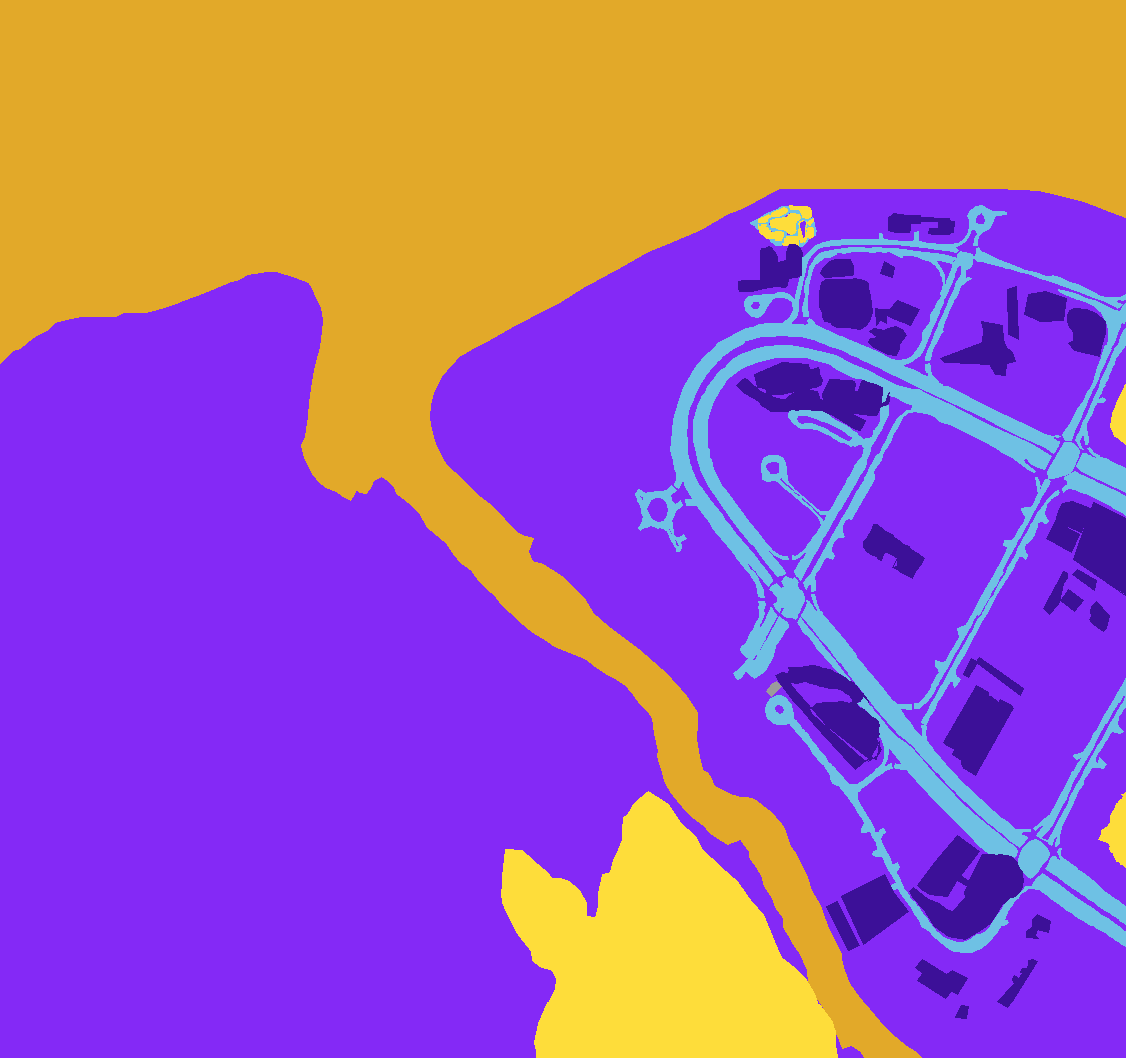

In [15]:
mask

In [16]:
mask_array = np.array(mask)

In [17]:
print(type(mask_array))
print(mask_array.shape)
print(mask_array.max())
print(mask_array.min())

<class 'numpy.ndarray'>
(1058, 1126, 3)
254
16


In [18]:
unique, counts = np.unique(mask_array, return_counts=True)
print(dict(zip(unique, counts)))

{16: 44863, 41: 1025643, 58: 57190, 60: 44863, 110: 63485, 132: 672292, 152: 44863, 155: 381, 169: 353351, 193: 63485, 221: 57190, 226: 353351, 228: 63485, 246: 672292, 254: 57190}


In [19]:
mask = mask.convert('L')

In [20]:
mask_array = np.array(mask)

In [21]:
print(type(mask_array))
print(mask_array.shape)
print(mask_array.max())
print(mask_array.min())

<class 'numpy.ndarray'>
(1058, 1126)
212
45


In [22]:
unique, counts = np.unique(mask_array, return_counts=True)
print(dict(zip(unique, counts)))

{45: 44863, 92: 672292, 155: 127, 171: 353351, 172: 63485, 212: 57190}


## Use torchvision transforms

In [23]:
pil_to_tensor_transform = PILToTensor()
to_tensor_transform = ToTensor()

### PILToTensor

In [24]:
mask_tensor = pil_to_tensor_transform(mask)

In [25]:
print(type(mask_tensor))
print(mask_tensor.shape)
print(mask_tensor.max())
print(mask_tensor.min())

<class 'torch.Tensor'>
torch.Size([1, 1058, 1126])
tensor(212, dtype=torch.uint8)
tensor(45, dtype=torch.uint8)


In [26]:
unique, counts = np.unique(mask_tensor.to('cpu'), return_counts=True)
print(dict(zip(unique, counts)))

{45: 44863, 92: 672292, 155: 127, 171: 353351, 172: 63485, 212: 57190}


### ToTensor

In [27]:
mask_tensor = to_tensor_transform(mask)

In [28]:
print(type(mask_tensor))
print(mask_tensor.shape)
print(mask_tensor.max())
print(mask_tensor.min())

<class 'torch.Tensor'>
torch.Size([1, 1058, 1126])
tensor(0.8314)
tensor(0.1765)


In [29]:
unique, counts = np.unique(mask_tensor.to('cpu'), return_counts=True)
print(dict(zip(unique, counts)))

{0.1764706: 44863, 0.36078432: 672292, 0.60784316: 127, 0.67058825: 353351, 0.6745098: 63485, 0.83137256: 57190}


## Sanity check dataloader class

In [1]:
from torch.utils.data import DataLoader
from torchvision import transforms

from src.datasets.DubaiSemanticSegmentationDataset import (
    DubaiSemanticSegmentationDataset,
)

In [2]:
DUBAI_DATASET_PATH = "data/DubaiSemanticSegmentationDataset"
IMAGE_SIZE = 576

In [3]:
example_dataset = DubaiSemanticSegmentationDataset(
    DUBAI_DATASET_PATH,
    # transforms=[Compose([Resize(IMAGE_SIZE), ResizeToDivisibleBy32()])]
    )
print(len(example_dataset))

72


In [4]:
example_loader = DataLoader(example_dataset, batch_size=1, shuffle=True)

In [5]:
for images, masks in example_loader:
    print(images.shape)
    print(masks.shape)
    break

torch.Size([1, 3, 658, 682])
torch.Size([1, 1, 658, 682])


In [6]:
example_mask = example_dataset[0][1]
print()
print(example_mask.shape)
print(example_mask.max())
print(example_mask.min())


torch.Size([1, 644, 797])
tensor(5, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)


In [7]:
print(type(masks))
print(masks.max())
print(masks.min())

<class 'torch.Tensor'>
tensor(5, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)


In [10]:
unique, counts = np.unique(masks.to('cpu'), return_counts=True)
print(dict(zip(unique, counts)))

{0: 6013, 1: 153711, 2: 14038, 4: 265622, 5: 9372}
